<a id="0"></a>
# Big Data with MapReduce and Apache Mahout

### Content
* [1. Report](#1)

    * [1.1 Descriptive Statistics with MapReduce](#1.1)
        * [1.1.1 Introduction](#1.1.1)
        * [1.1.2 Results](#1.1.2)
    * [1.2 Data Analysis with Apache Mahout](#1.2)
        * [1.2.1 Introduction](#1.2.1)
        * [1.2.2 Results](#1.2.2)

* [2. Code](#2)

    * [2.1 MapReduce](#2.1)
        * [2.1.1 Descriptive Statistics with MapReduce](#2.1.1)
    * [2.2 Mahout](#2.2)
        * [2.2.1 K-Means Cluster with Mahout](#2.2.1)
        * [2.2.2 Data Extraction and Analysis](#2.2.2)
    
* [References](#3)

<a id="1"></a>
# 1. Report

<a id="1.1"></a>
## 1.1 Descriptive Statistics with MapReduce

<a id="1.1.1"></a>
### 1.1.1 Introduction

In this project, we are going to use weather data from NCDC to find descriptive statistics for different weather parameters . The data is collected from different weather stations in July 2007 and is processed daily, from 01/07 to 19/07. To calculate the statistics, no libraries are used, only the MapReduce framework.

MapReduce can be considered a programming paradigm capable of enabling massive scalability across a large number of servers in a Hadoop cluster. The MapReduce term refers to two separate jobs that are performed in the process. The first job is the mapping job. The mapping job takes a set of data as input and converts it into a set of key-value pairs. [1] The reduce job takes the output produced by the mapping job as input and combines the data into a smaller set. As implied by the name MapReduce, the map job is run before the reduce job. However, MapReduce has some limitations. The framework is not flexible. It has only one possible flow of execution. The framework can only offer solutions to problems that can be adapted to the MapReduce flow. In our case, since our aim was to extract some simple statistics from weather data, we managed to adapt to its flow. However, the amount of code written was high. This brings another limitation to the framework. the need for a lot of manual coding required even for simple common operations sunch as join, sort, filter etc. [2] 

There are many columns in the dataset, but the only columns of interest for our project are the observation date, the wind speed, relative humidity, dew point temperature, and dry bulb temperature. By selecting only this data, the observations can be grouped by day and statistics like daily maximum, daily minimum daily average and variance can be calculated.

The pseudo-code for the map and reduce operations is shown below. For simplicity, for the reducer class only the mean function is shown. A separate reducer is used for every unique key or in this case date. For more information we could refer to the python code below.

**class Mapper**

```
FOR EACH dataset row
	SET the key to the observation date
	SET the value as [dry bulb temperature, dew point temperature, humidity, wind speed]
	OUTPUT the key/value pair
END
```

**class Reducer**

```
SET sum = 0
SET n = 0
FOR EACH key/value pair coming from the mapper
	SET n = n + 1
	SET sum = sum + value
END
SET mean = sum / n
```

<a id="1.1.2"></a>
### 1.1.2 Results

After applying the Map and Reducer to the weather data, a file with 19 rows of strings (one for each day) and a correlation matrix that describes the monthly correlation among, Humidity, Wind_Speed, and Dry_Bulb_Temp will be produced. Each row contains the following values separated by commas:

*Day (YYYYMMDD), difference between Wind_Speed maximum and minimum, Humidity minimum, Dew_Point_Temp mean, and Dew_Point_Temp variance*

e.g.
*20070701, 31, 2, 54.4, 179.319630*

From the results we can say that Relative Humidity is negatively correlated to Wind_Speed and Dew_Point_Temperature. On the last day 19/07 the humidity is higher than the other days meaning that it has rained. The difference between the maximum and minimum wind speed is lower, the mean of dew point temperature is higher, and its variance is lower than the other days. The range of wind speed difference except for a couple of days is between 30 and 40. The humidity minimum values are low except for the last day. The same thing stands for the dew point temperature. However, its variance is higher in the other days and lower in the last day.

<a id="1.2"></a>
## 1.2 Data Analysis with Apache Mahout

<a id="1.2.1"></a>
### 1.2.1 Introduction

The answer to this question is divided into two parts. In the first part we are going to perform a cluster analysis using only Apache Mahout. In the second part we are going to apply some data analysis to compare the performance of different clusters, plot the elbow graph and find the best number of k and distance measure.

The command-line tools of Apache Mahout are used to convert the dataset to a suitable file format for processing by Hadoop, create a TF-IDF feature matrix, and perform clustering with the K-Means algorithm.

**K-Means Clustering**

K-Means Clustering is an unsupervised algorithm. It groups an unlabelled set of data into different K clusters, where K is the number of clusters. Each of these clusters is associated with a centroid. The algorithm aims to minimize the sum of distances between the data points present in a cluster and their centroids.
The K-Means clustering algorithm has the following steps:

1. Select the number of K's.
2. Select random number of K points as centroids.
3. Assign each remaining point to the nearest centroid.
4. Re-calculate centroids
5. Repeat steps 3 and 4 until there are no more changes.

**Apache Mahout**

Apache Mahout is an open-source project. It is mostly used for creating scalable machine learning algorithms. Mahout operates in addition to Hadoop framework, that allows the application of machine learning techniques using distributed computing. Mahout's algorithms include, clustering, recommendation mining, classification, etc.

**Mahout Limitations**

During this project there were no problems encountered with Mahout, probably because the british-corpus data was relatively small. However, according to different sources it is inefficient compared to other frameworks. It tends to run out of memory if the dataset is too large and some algorithms are not supported. Furthermore, there is a shortage of support. Other framework like MLlib offer faster computing time. [3] [4]

<a id="1.2.2"></a>
### 1.2.2 Results

To decide which is the best setting for K-Means clustering for this dataset, we are going to analyze the inter cluster, intra cluster density and density ratio extracted from the Mahout cluster dumps. The best setting is the one that produces clusters where the data points are similar and therefore densely packed. Furthermore, the best setting produces clusters that are different between them. So, in our case, the best distance measure has the lowest inter cluster density and the highest intra cluster and density ratio.

After computing the experiments, we can say that as the number of K increases, the average point distance for all distance measures decreases. The best distance measure is Manhattan because it has a higher intra cluster density and density ratio. Another good distance measure was the Euclidean distance measure, while Cosine performed the worst in all experiments. However, to produce more significant results, it would be necessary to extend the number of K's taken into consideration.

One way of finding the optimum number of clusters for the K-Means clustering algorithm is the Elbow Method. It is often used to determine the point of diminishing returns for selecting the K value. The Elbow method helps finding the best number of clusters, by using the WCSS values concept. WCSS stands for Within Cluster Sum of Squares and defines the total variations within a cluster. To find the optimal number of clusters, the elbow method follows four steps:

1. Run the cluster algorithm for different K values.
2. Calculate the sum of squares WCSS value for each K.
3. Plot a curve between sum of squares values and the number of clusters.
4. The sharp point of the bend is then considered as the optimal value for the number of clusters K.

For the cosine and euclidean distance measures the elbow point is not so clear, so to find the optimum number of clusters we might need to try a larger number of k. For the Manhattan distance measure, we could say that the optimum number of K is 8.

<a id="2"></a>
# 2. Code

<a id="2.1"></a>
## 2.1 MapReduce

<a id="2.1.1"></a>
### 2.1.1 Descriptive Statistics with MapReduce

This Jupyter notebook is intended as a report which explains the mapper and reducer classes and runs the statistics in the local machine. Screenshots of the terminal can be seen in the mapreduce_terminal.pdf file present in the same directory as this notebook. **To run the analysis in the cluster the following code needs to be inserted in the cluster terminal after creating a dsm010/cw_question_1 local file and uploading 200707hourly.txt, mapper.py, and reducer.py**
These files, except from the weather data(200707hourly.txt), can be found in the same directory.
```bash
# removes existing output
hadoop fs -rm -r cwq1_output
hadoop fs -rm -r dsm010/cw_question_1
hadoop fs -copyFromLocal dsm010/cw_question_1 dsm010
# executes the job
hadoop jar /opt/hadoop/current/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar \
    -input dsm010/cw_question_1/200707hourly.txt \
    -output cwq1_output \
    -file dsm010/cw_question_1/mapper.py \
    -mapper mapper.py \
    -file dsm010/cw_question_1/reducer.py \
    -reducer reducer.py

# shows the output
hadoop fs -cat cwq1_output/part-00000
```

In [1]:
class Mapping():
    """
    Class for implementing the mapping process.
    """
    def input_map(self, data_input):
        """
        Function that maps each input to the output.
        Parameter
        ----------
        input_data : iterable
            Data to be processed.
        """
        data_output = []

        for element in data_input:
            mapped_element = self.map_function(element)
            if mapped_element:
                print(mapped_element)

        return data_output

    def map_function(self, element):
        """
        Function for mapping the input to the day the observations the dry bulb temperature, dew point temperature, 
            humidity, wind speed values.

        Parameters
        ----------
        item : str
            The data to be mapped.

        Returns
        -------
        output : str
            String that contains the date format YYYYMMDD and dry bulb temperature, dew point temperature , 
            humidity and wind speed.
        """
        # code for ignoring the headers of the file
        if element.startswith('Wban Number'):
            return None

        # code for ignoring empty lines
        if element == '\n':
            return None

        # input tokenization
        token = element.split(',')

        # extract the day value
        day = token[1].strip()

        # code for extracting the dry bulb temperature, dew point, humidity, wind speed
        dry_bulb_temp_value = token[8].strip()
        dew_point_value = token[9].strip()
        humidity_value = token[11].strip()
        wind_speed_value = token[12].strip()
        # will not process empty or wrong values
        for i in (dry_bulb_temp_value, dew_point_value, humidity_value, wind_speed_value):
            if i in  ['-','','/0','//','`0']:
                return None
            else:
                i = int(i)

        # return the key and values
        return '%s,%s,%s,%s,%s' % (day, dry_bulb_temp_value, dew_point_value, humidity_value, wind_speed_value)

In [2]:
class Help_reduce():
    """
    Class that contains some helping functions and the values that are going to be calculated from
    the reducing function.
    """
    def __init__(self, day):
        self.day = day
        self.wind_speed_values = []
        self.humidity_values = []
        self.dew_point_values = []
        self.dry_bulb_temp_values=[]
        self.wind_speed_daily_max = None
        self.wind_speed_daily_min = None
        self.humidity_daily_min = None
        self.dew_point_values_sum = 0
        self.dew_point_values_squared_sum = 0
        self.dew_point_values_n = 0

    def add_value(self, wind_speed_value, humidity_value, dew_point_value,dry_bulb_temp_value) -> None:
        """
        Add a value to the value collection.
        
        Parameters
        ----------
        wind_speed_value, humidity_value, dew_point_value,dry_bulb_temp_value : str
            The output from the mapper.
        """
        # add the value to the collection
        self.wind_speed_values.append(wind_speed_value)
        self.humidity_values.append(humidity_value)
        self.dew_point_values.append(dew_point_value)
        self.dry_bulb_temp_values.append(dry_bulb_temp_value)
        # update the maximum and minimum values
        if self.wind_speed_daily_max is None:
            # initializing maximum and minimum values
            self.wind_speed_daily_max = wind_speed_value
            self.wind_speed_daily_min = wind_speed_value
        else:
            if wind_speed_value > self.wind_speed_daily_max: self.wind_speed_daily_max = wind_speed_value
            if wind_speed_value < self.wind_speed_daily_min: self.wind_speed_daily_min = wind_speed_value
        
        # update maximums and minimums
        if self.humidity_daily_min is None:
            # initializing maximum and mininimum values
            self.humidity_daily_min = humidity_value
        else:
            if humidity_value < self.humidity_daily_min: self.humidity_daily_min = humidity_value
        # update "running" values
        self.dew_point_values_n += 1
        self.dew_point_values_sum += dew_point_value
        self.dew_point_values_squared_sum += dew_point_value * dew_point_value
        
    def variance_function(self) -> float:
        """
        Function for calculating and returning the variance.

        """
        mean = self.dew_point_values_sum / float(self.dew_point_values_n)

        return  (1.0 / self.dew_point_values_n) * (self.dew_point_values_squared_sum - self.dew_point_values_n * mean*mean)
        
    def combinations(self):
        """
        Calculate the correlation of the values.
        """
        correlations=[]
        for i in [self.wind_speed_values,self.humidity_values,self.dry_bulb_temp_values]:
            for j in [self.wind_speed_values,self.humidity_values,self.dry_bulb_temp_values]:
                mi = sum(i)/len(i)
                mj = sum(j)/len(j)
                cov = sum((a - mi) * (b - mj) for (a,b) in zip(i,j)) / len(i)
                stdevi = (sum((a - mi)**2 for a in i)/len(i))**0.5
                stdevj = (sum((b - mj)**2 for b in j)/len(j))**0.5
                result = round(cov/(stdevi*stdevj),3)
                #print(result)
                correlations.append(result)
        return correlations
    
    def create_matrix(self,correlation):
        """
        Creates a matrix with the correlations.
        
        Parameters
        ----------
        correlation : str
            correlation between values.
        """
        sqrt = int(len(correlation) ** 0.5)
        matrix = []
        while correlation != []:
            matrix.append(correlation[:sqrt])
            correlation = correlation[sqrt:]
        return matrix

        
    
    def output(self) -> None:
        """
        Print the day values to stdout.
       
        """
        # calculate the mean
        wind_speed_daily_difference = self.wind_speed_daily_max - self.wind_speed_daily_min
        dew_point_values_mean = self.dew_point_values_sum / float(self.dew_point_values_n)
        # print the output
        print('%s, %d, %d, %.1f, %.6f' % (
            self.day,
            wind_speed_daily_difference,
            self.humidity_daily_min,
            dew_point_values_mean,
            self.variance_function()
            ))

class Reducing():
    """
    Class for summarizing the observations for each day.
    """
    def input_reduce(self, input_data):
        """
        Function that reduces the output of the mapper 
        to calculate the maximum, minimum, mean, variance, correlation and matrix.

        Parameter
        ----------
        input_data : iterable
            The input data that is going to be processed.
        """
        current_day = Help_reduce(None)
        for element in input_data:
            if element:
                # get the day and values
                day_value, dry_bulb_temp_value,dew_point_value, humidity_value, wind_speed_value = element.split(',')       
                day_value = str(day_value)
                wind_speed_value = int(wind_speed_value)
                humidity_value = int(humidity_value)
                dew_point_value = int(dew_point_value)
                dry_bulb_temp_value = int(dry_bulb_temp_value)
                
                if current_day.day == day_value:
                    current_day.add_value(wind_speed_value, humidity_value, dew_point_value,dry_bulb_temp_value)
                else:
                    # show the output if the current day exists
                    if current_day.day:
                        current_day.output()

                    # create the new day
                    current_day = Help_reduce(day_value)
                    current_day.add_value(wind_speed_value, humidity_value, dew_point_value, dry_bulb_temp_value)

        # print the last processed day
        if current_day.day == day_value:
            current_day.output()   
        print (current_day.create_matrix(current_day.combinations()))

In [3]:
with open('/home/bfezo001/dsm010/cw_question_1/200707hourly.txt') as input_file:
    mapper = Mapping()
    reducer = Reducing()
    
    # perform the mapping task
    mapper_output = map(mapper.map_function, input_file)

   # remove null values and sort the mapped output
    mapper_output = list(filter(None, mapper_output))
    mapper_output.sort()
    # perform the reduce function
    reducer.input_reduce(mapper_output)

20070701, 31, 2, 54.4, 179.319630
20070702, 80, 2, 54.9, 172.632865
20070703, 37, 3, 57.3, 157.355049
20070704, 29, 3, 59.6, 123.422502
20070705, 37, 3, 60.2, 108.453107
20070706, 64, 3, 59.4, 105.319097
20070707, 51, 3, 59.8, 116.194016
20070708, 37, 3, 61.2, 121.792187
20070709, 36, 2, 61.5, 132.658168
20070710, 40, 4, 61.2, 137.674701
20070711, 37, 2, 59.1, 125.504252
20070712, 32, 4, 56.9, 104.966661
20070713, 31, 3, 57.0, 102.279520
20070714, 30, 5, 58.2, 92.490864
20070715, 36, 6, 59.1, 98.703993
20070716, 35, 6, 59.6, 103.332373
20070717, 35, 4, 61.6, 93.915360
20070718, 39, 4, 63.6, 87.632828
20070719, 12, 63, 74.8, 2.007822
[[1.0, -0.426, 0.373], [-0.426, 1.0, -0.942], [0.373, -0.942, 1.0]]


<a id="2.2"></a>
## 2.2 Mahout

<a id="2.2.1"></a>
### 2.2.1 K-Means Cluster with Mahout

This Jupyter notebook is intended as a report and only shows the code but does not run it. Screenshots of the terminal can be seen in the mahout_terminal.pdf file present in the same directory as this notebook. The code present in the subsections from "Upload data to hadoop file system" until "Hyperparameters" can be run in the command prompt. **First, before running the code we need to create a dsm010/cw_01 directory in the local machine where the british-fiction-corpus can be uploaded, then run the code.** The british-fiction-corpus dataset can be found in Topic 4.

#### Upload data to hadoop file system

```bash
# make directory
hadoop fs -mkdir dsm010/question_2
# copy files from local to hdfs
hadoop fs -copyFromLocal dsm010/cw_01/british-fiction-corpus dsm010/question_2
# list files present in the directory
hadoop fs -ls dsm010/question_2/british-fiction-corpus
```

#### Create sequence files from the raw text using Mahout
SequenceFiles consist of key/value pairs. Each document is represented as a key-value pair. The key is the document ID
while the value is the content
```bash
mahout seqdirectory \
     -i dsm010/question_2/british-fiction-corpus \
     -o dsm010/question_2/british-fiction-corpus-seqfiles \
     -c UTF-8 \
     -chunk 5
```

#### Create a sparse (efficient) representation of the vectors using Mahout

```bash
mahout seq2sparse \
     -nv \
     -i dsm010/question_2/british-fiction-corpus-seqfiles \
     -o dsm010/question_2/british-fiction-corpus-vectors \

# list the generated output in HDFS
hadoop fs -ls dsm010/question_2/british-fiction-corpus-vectors/tf-vectors
hadoop fs -ls dsm010/question_2/british-fiction-corpus-vectors/tfidf-vectors

# we can generate “canopies”, which will help approximate centroids for K-Means
mahout canopy \
    -i dsm010/question_2/british-fiction-corpus-vectors/tf-vectors \
    -ow \
    -o dsm010/question_2/british-fiction-corpus-canopy-centroids \
    -dm org.apache.mahout.common.distance.CosineDistanceMeasure \
    -t1 0.5 \
    -t2 0.3

#t1 is known as loose distance and t2 is known as tight distance and t1 > t2. t1 and t2 values must be compatible with the selected distance measure. Let’s have a look at what was generated:
hadoop fs -ls dsm010/question_2/british-fiction-corpus-canopy-centroids/
```

Output

```bash
Found 1 items
drwxr-xr-x   - bfezo001 users          0 2023-01-04 13:44 dsm010/question_2/british-fiction-corpus-canopy-centroids/clusters-0-final
```

#### Run the K-Means algorithm with Mahout
```bash
mahout kmeans \
    -i dsm010/question_2/british-fiction-corpus-vectors/tf-vectors \
    -c dsm010/question_2/british-fiction-corpus-canopy-centroids \
    -o hdfs://lena/user/bfezo001/dsm010/question_2/british-fiction-corpus-kmeans-clusters \
    -dm org.apache.mahout.common.distance.CosineDistanceMeasure \
    -cl -cd 0.1 -ow -x 20 \
    -k 10
```

#### Find the ‘final’ iteration’s clustering solution
```bash
hadoop fs -ls dsm010/question_2/british-fiction-corpus-kmeans-clusters
```

Output

```bash
Found 5 items
-rw-r--r--   3 bfezo001 users        194 2023-01-04 13:50 dsm010/question_2/british-fiction-corpus-kmeans-clusters/_policy
drwxr-xr-x   - bfezo001 users          0 2023-01-04 13:50 dsm010/question_2/british-fiction-corpus-kmeans-clusters/clusteredPoints
drwxr-xr-x   - bfezo001 users          0 2023-01-04 13:49 dsm010/question_2/british-fiction-corpus-kmeans-clusters/clusters-0
drwxr-xr-x   - bfezo001 users          0 2023-01-04 13:50 dsm010/question_2/british-fiction-corpus-kmeans-clusters/clusters-1
drwxr-xr-x   - bfezo001 users          0 2023-01-04 13:50 dsm010/question_2/british-fiction-corpus-kmeans-clusters/clusters-2-final
```

#### Evaluate the solution
```bash
mahout clusterdump \
    -dt sequencefile \
    -d dsm010/question_2/british-fiction-corpus-vectors/dictionary.file-* \
    -i dsm010/question_2/british-fiction-corpus-kmeans-clusters/clusters-2-final  \
    -o ~/dsm010/question_2/output/british-fiction-corpus-clusters.txt -b 100 \
    -p dsm010/question_2/british-fiction-corpus-kmeans-clusters/clusteredPoints \
    -n 20 --evaluate

# The final lines give a statistical evaluation of the clustering solution.
tail -n 5 ~/dsm010/question_2/output/british-fiction-corpus-clusters.txt
```

Output

```bash
Inter-Cluster Density: 0.39323821383258706
Intra-Cluster Density: 0.5254062280354826
CDbw Inter-Cluster Density: 0.0
CDbw Intra-Cluster Density: 0.7395510404138697
CDbw Separation: 2.3556367404655644E8
```

#### Hyperparameters

```bash
# range to use for k
k_start=1
k_end=10

# vectors and dictionary path
path_vectors=dsm010/question_2/british-fiction-corpus-vectors/tf-vectors
path_dictionary=dsm010/question_2/british-fiction-corpus-vectors/dictionary.file-*

# clusters output base path and result's local output path
path_hdfs_base=hdfs://lena/user/bfezo001/
path_clusters_base=dsm010/question_2/british-fiction-corpus-kmeans
path_results_base=~/dsm010/question_2/output/british-fiction-corpus-clusters

# distance metrics used Cosine, Euclidean, Manhattan
distance_metrics=("org.apache.mahout.common.distance.CosineDistanceMeasure" "org.apache.mahout.common.distance.EuclideanDistanceMeasure" "org.apache.mahout.common.distance.ManhattanDistanceMeasure")

for distance_metric in "${distance_metrics[@]}"
do
  echo "--- Distance Metric: $distance_metric"

    # perform the canopy clustering
    distance_name=${distance_metric##*.}
    path_centroids=dsm010/question_2/british-fiction-corpus-canopy-centroids/${distance_name}

    mahout canopy \
      -i $path_vectors \
      -ow \
      -o $path_centroids \
      -dm $distance_metric \
      -t1 0.5 \
      -t2 0.3

  for ((k = $k_start; k <= $k_end; k++))
  do
    
    k_padded=$(printf %02d $k)

    # set the output path for the clusters
    path_clusters="${path_clusters_base}/${distance_name}/${k_padded}"

    echo "---- K: $k_padded -- $path_clusters"

    # run k-means clustering
    mahout kmeans \
    -i $path_vectors \
    -c $path_centroids \
    -o "${path_hdfs_base}${path_clusters}" \
    -ow \
    -dm $distance_metric \
    -cl -cd 0.1 -ow -x 20 \
    -k $k

    # set the path for output
    path_final_clusters=`hadoop fs -ls -d -C "${path_clusters}/clusters-*-final"`
    path_clusterpoints="${path_clusters}/clusteredPoints"
    path_results="${path_results_base}/${distance_name}/${k_padded}.txt"

    # results output
    mahout clusterdump -dt sequencefile \
       -d $path_dictionary \
       -i $path_final_clusters  \
       -o $path_results \
       -of TEXT \
       -b 100 \
       -p $path_clusterpoints \
       -dm $distance_metric \
       -n 20 --evaluate
  done  
done
```

<a id="2.2.2"></a>
### 2.2.2 Data Extraction and Analysis

For the data analysis part we are going to extract the data from the Mahout cluster dumps

In [4]:
# import necessary libraries
import os
import re
import logging
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

Extract the data produced by Mahout. **To be able to do the data extraction we need to run the above mahout code in the terminal to create the folder output/british-fiction-corpus-clusters. The folder cannot be uploaded in this coursework because it is bigger than 120 MB.**

In [5]:
class DataExtraction():
    """
    Extract data from mahout clusterdump.
    """
    def file(self, file_path:str) -> tuple:
        """
        Process the file and extract the data.

        Returns
        -------
        output_data : pandas.DataFrame
            The DataFrame will contain the following columns: cluster_identifier, point_distance, inter_cluster_density, intra_cluster_density
        """
        logging.info('- Processing: %s' % file_path)

        raw_data = []
        current_cluster = None
        inter_cluster_density = None
        intra_cluster_density = None

        # load the values from the text file
        with open(file_path) as file:
            while (line := file.readline()):
                if cluster_identifier := re.search(r'^:{"identifier":"(.+?)"', line): # start of a new cluster
                    current_cluster = cluster_identifier.group(1)
                    logging.info('-- Cluster: %s' % current_cluster)
                elif point_distance := re.match(r'^\s*.+? : \[distance=(.+?)\]', line): # handle a point in the cluster
                    point_distance = float(point_distance.group(1))

                    # add the point to the raw data
                    raw_data.append({
                        'cluster_identifier': current_cluster,
                        'point_distance': point_distance
                    })
                elif density_match := re.match(r'^Inter-Cluster Density:\s(.+)', line): # match the inter density line
                    inter_cluster_density = density_match.group(1)
                    logging.info('--- Inter-Cluster Density: %s', inter_cluster_density)
                elif density_match := re.match(r'^Intra-Cluster Density:\s(.+)', line): # match the intra density line
                    intra_cluster_density = density_match.group(1)
                    logging.info('--- Intra-Cluster Density: %s', intra_cluster_density)

        # create the output dataframe
        output_data = pd.DataFrame(raw_data)
        output_data['inter_cluster_density'] = inter_cluster_density
        output_data['intra_cluster_density'] = intra_cluster_density

        # return the output values
        return output_data

    def distance_folder(self, folder_path:str) -> pd.DataFrame:
        """
        Process distance folder containing the files for each value of K.

        Parameters
        ----------
        folder_path : str
            The path of the folder to process.

        Returns
        -------
        output_data : pandas.DataFrame
            The combined output of each file processed in the folder.
        """
        output_data = pd.DataFrame()

        # get the name of the distance measure from the folder path
        distance_measure = os.path.split(folder_path)[-1].replace('DistanceMeasure', '')
        logging.info('- Distance Measure: %s' % distance_measure)

        # process each file
        for file_path in os.listdir(folder_path):
            # get the data for the folder
            folder_data = self.file('%s/%s' % (folder_path, file_path))
            
            folder_data['distance_measure'] = distance_measure
            folder_data['k'] = file_path.replace('.txt', '')
            output_data = pd.concat([output_data, folder_data])
        
        # return the output dataframe
        return output_data.reset_index(drop=True)

    def cluster_folder(self, folder_path:str) -> pd.DataFrame:
        """
        Process a cluster folder and sub folders.

        Parameters
        ----------
        folder_path : str
            The path of the cluster folder to process.

        Returns
        -------
        output_data : pandas.DataFrame
            Cluster data output.
        """
        output_data = pd.DataFrame()

        # process each folder
        for file_path in os.listdir(folder_path):
            logging.info(file_path)

            # get the data for the folder
            folder_data = self.distance_folder('%s/%s' % (folder_path, file_path))
            output_data = pd.concat([output_data, folder_data])

        # return the output dataframe
        return output_data.reset_index(drop=True)


# extract the experiment values
extract = DataExtraction()
df = extract.cluster_folder('output/british-fiction-corpus-clusters')
df.sample(n=5)

,cluster_identifier,point_distance,inter_cluster_density,intra_cluster_density,distance_measure,k
438,VL-5,867.787294,NaN,0.7147719780730082,Euclidean,02
188,VL-21,0.314133,NaN,0.667046448783313,Cosine,02
472,VL-23,1941.785487,NaN,0.7151365780668429,Euclidean,01
241,VL-21,0.505650,0.6853061757770863,0.5693612777429371,Cosine,09
622,VL-0,28917.333333,0.35303095125361245,0.5785388355386845,Manhattan,10


In [6]:
# select k values greater than 2
df = df[df['k'] > '02']

# convert the density values to float
df['inter_cluster_density'] = df['inter_cluster_density'].astype(float)
df['intra_cluster_density'] = df['intra_cluster_density'].astype(float)

# calculate the density ration
df['density_ration'] = df['intra_cluster_density'] / df['inter_cluster_density']

# sort the dataset amd reset the index
df = df.sort_values(by=['distance_measure', 'k'])
df.reset_index(drop=True, inplace=True)

Scale the distances per distance measure to allow comparisons to be made.

In [7]:
def scale_values(values) -> pd.DataFrame:
    """
    Perform scaling on grouped data.
    """
    scaler = preprocessing.StandardScaler()
    return pd.DataFrame(scaler.fit_transform(np.atleast_2d(values)), values.index)

# scale the values for each distance measure
df['scaled_point_distance'] = df.groupby(by=['distance_measure'])[['point_distance']].apply(scale_values)

In [8]:
# group by the distance measure and k
df_dist_mean = df.groupby(by=['distance_measure', 'k']).aggregate('mean')
df_dist_mean.query('distance_measure == ["Cosine","Euclidean","Manhattan"]')

point_distance  inter_cluster_density  \
distance_measure k                                           
Cosine           03        0.439862               0.593657   
                 04        0.409017               0.623275   
                 05        0.406567               0.645251   
                 06        0.362324               0.591802   
                 07        0.355171               0.596909   
                 08        0.312399               0.670177   
                 09        0.297806               0.685306   
                 10        0.277924               0.690389   
Euclidean        03     1327.703840               0.653869   
                 04     1247.949380               0.568309   
                 05     1243.888285               0.505781   
                 06     1229.522701               0.568568   
                 07     1070.630564               0.488504   
                 08     1100.436515               0.588674   
                 09     1067.462959               0.615223   
                 10      835.954747               0.466708   
Manhattan        03    48659.989418               0.567701   
                 04    39000.451499               0.514591   
                 05    37096.914815               0.468400   
                 06    33439.232510               0.434544   
                 07    32850.362963               0.414859   
                 08    30750.889839               0.342714   
                 09    28767.135802               0.331979   
                 10    24614.618234               0.353031   

                     intra_cluster_density  density_ration  \
distance_measure k                                           
Cosine           03               0.600622        1.011732   
                 04               0.646378        1.037067   
                 05               0.562363        0.871542   
                 06               0.651378        1.100669   
                 07               0.623863        1.045155   
                 08               0.569155        0.849261   
                 09               0.569361        0.830813   
                 10               0.577542        0.836546   
Euclidean        03               0.568664        0.869692   
                 04               0.617191        1.086013   
                 05               0.565252        1.117582   
                 06               0.641312        1.127944   
                 07               0.562028        1.150508   
                 08               0.720307        1.223610   
                 09               0.625853        1.017279   
                 10               0.598039        1.281399   
Manhattan        03               0.695440        1.225010   
                 04               0.665725        1.293697   
                 05               0.619657        1.322924   
                 06               0.694319        1.597810   
                 07               0.582139        1.403221   
                 08               0.613060        1.788837   
                 09               0.691113        2.081801   
                 10               0.578539        1.638777   

                     scaled_point_distance  
distance_measure k                          
Cosine           03               0.496213  
                 04               0.310077  
                 05               0.295289  
                 06               0.028301  
                 07              -0.014862  
                 08              -0.272973  
                 09              -0.361033  
                 10              -0.481011  
Euclidean        03               0.229295  
                 04               0.131638  
                 05               0.126665  
                 06               0.109075  
                 07              -0.085484  
                 08              -0.048988  
                 09              -0.089363  
                 10           

#### Verifying the relation between the average distance to the centroid and the K value

In the plot below the progress of the average distance to the centroid of points is shown for all distance measures, Cosine, Euclidean and Manhattan. We can see that as the number of k increases the average point distance for all distance measures decreases.

[Text(0.5, 1.0, 'Average Point Distance (scaled)'),
 Text(0.5, 0, 'K'),
 Text(0, 0.5, 'Distance from Centroid')]

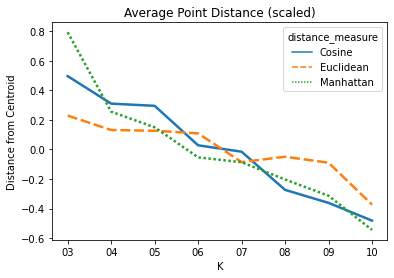

In [9]:
sns.lineplot(
    data=df_dist_mean,
    x='k',
    y='scaled_point_distance',
    hue='distance_measure',
    style='distance_measure',
    linewidth=2.5).set(
        title='Average Point Distance (scaled)',
        xlabel='K',
        ylabel='Distance from Centroid')

#### Finding best setting for K-Means clustering comparing different clusters obtained with different distance measures

To decide which is the best setting for k-means clustering for this dataset we need to analyse the inter cluster, intra cluster density and density ratio extracted from the Mahout cluster dumps. The best setting is the one that produces clusters where the data points are similar and therefore densely packed. Furthermore, the best setting produces clusters that are different between them. So, in our case the best distance measure has the lowest inter cluster density and the highest intra cluster and density ratio.

##### Inter Cluster Density
In the following plot, in the case of Euclidean and Manhattan distance measures the inter cluster density correctly decreases with higher k values, with Manhattan being the best distance measure because it reaches lower values. However for the Cosine distance measure, the trend seems to be positive and there is a lot of fluctuation.

[Text(0.5, 1.0, 'Inter Cluster Density'),
 Text(0.5, 0, 'K'),
 Text(0, 0.5, 'Density')]

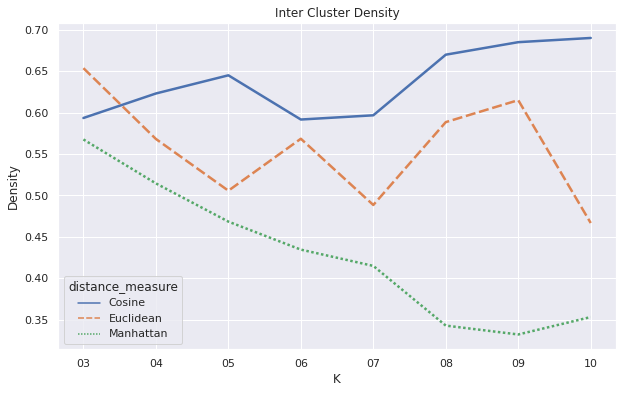

In [10]:
sns.set(rc={"figure.figsize":(10, 6)})

# plot inter cluster density
sns.lineplot(
    data=df_dist_mean,
    x='k',
    y='inter_cluster_density',
    hue='distance_measure',
    style='distance_measure',
    linewidth=2.5).set(
        title='Inter Cluster Density',
        xlabel='K',
        ylabel='Density')

##### Intra Cluster Density
The intra cluster density plot is not very informative since no clear trend can be detected for any of the distance measures and ther is a lot of fluctuation in all cases. In this case to decide the best distance measure we need to try a higher number of k.

[Text(0.5, 1.0, 'Intra Cluster Density'),
 Text(0.5, 0, 'K'),
 Text(0, 0.5, 'Density')]

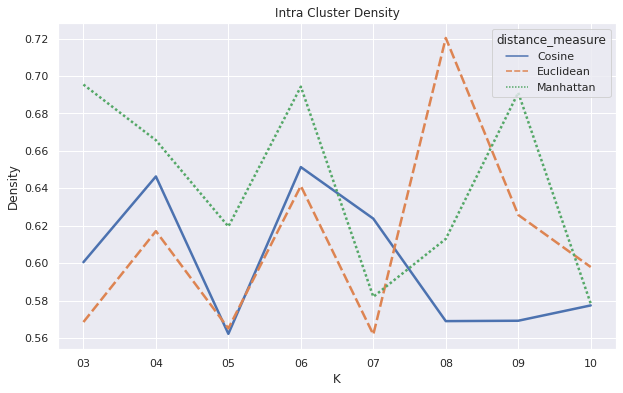

In [11]:
# plot intra cluster density
sns.lineplot(
    data=df_dist_mean,
    x='k',
    y='intra_cluster_density',
    hue='distance_measure',
    style='distance_measure',
    linewidth=2.5).set(
        title='Intra Cluster Density',
        xlabel='K',
        ylabel='Density')

##### Density Ratio
The density ratio is calculated from the intra cluster and inter cluster density.

$$ density\ ratio = {intra\ cluster \over inter\ cluster}$$

This measure is higher for cluster settings with high intra cluster density and low inter cluster density. In this case the Manhattan and Euclidean distance measures have a positive trend with Manhattan reaching higher values, while the Cosine distance measure experiences a negative trend.

[Text(0.5, 1.0, 'Density Ratio'), Text(0.5, 0, 'K'), Text(0, 0.5, 'Ratio')]

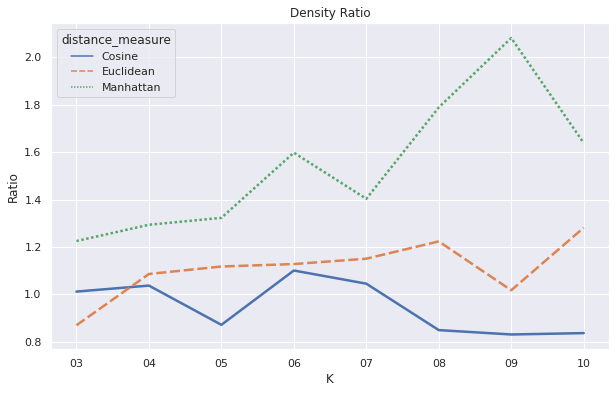

In [12]:
# plot density
sns.lineplot(
    data=df_dist_mean,
    x='k',
    y='density_ration',
    hue='distance_measure',
    style='distance_measure',
    linewidth=2.5).set(
        title='Density Ratio',
        xlabel='K',
        ylabel='Ratio')

To conclude, after computing the experiments above we can say that the best distance measure is Manhattan because it has higher intra cluster density and density ratio. Another good distance measure is the Euclidean distance measure while Cosine performed the worst in all experiments. However to produce more significant results would be necessary to extend the number of k's taken into consideration.

#### Find the optimum number (K) of clusters using the elbow graph

One way of finding the optimum number of clusters for the k-mean clustering is the Elbow Method. It is often used to determine the point of diminishing returns for selecting the K value. 
The Elbow method allows to find the optimal number of clusters, by using the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares and defines the total variations within a cluster.
To find the optimal number of clusters, the elbow method involves the following steps:

1. Runs the clustering algorithm for different K values.
2. Calculates the sum of squares WCSS value for each K.
3. Plots a curve between sum of squares values and the number of clusters K.
4. The sharp point of bend is then considered as the best value of the number of clusters K.

For the cosine and euclidean distance measures the elbow point is not so clear, so to find the optimum number of k we might need to try a larger number of k. For the Manhattan distance measure we could say that the optimum number of k is 8.

[Text(0.5, 0, 'K'), Text(0, 0.5, 'Sum of squared distance')]

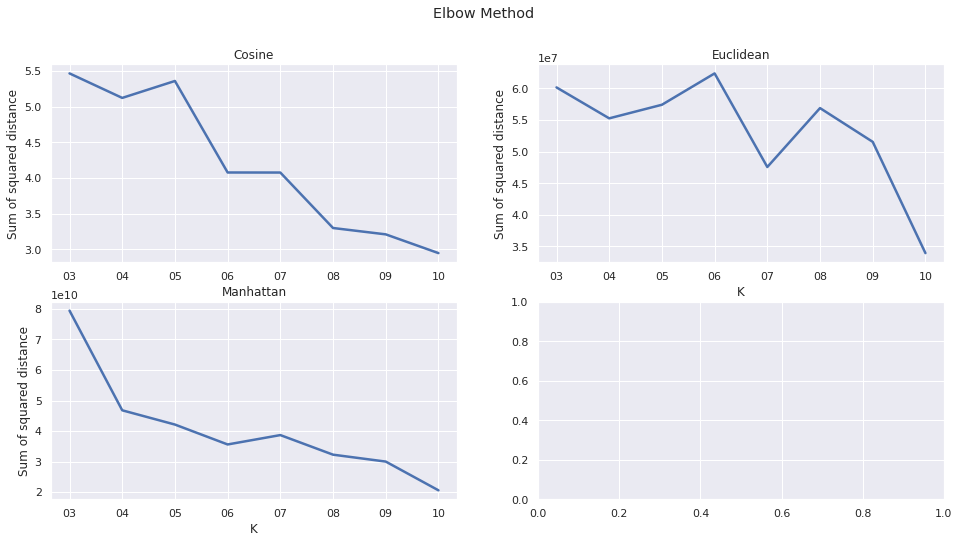

In [13]:
# add a column for the squared distances
df['squared_distance'] = df['point_distance'] **2

# create the grouping to draw the chart for the elbow method
df_distance = df.groupby(by=['distance_measure', 'k']).aggregate('sum')

def plt_elbow(distance_measure:str, axes=None):
    """
    Plot squared distance from centroid.
    """
    plt = sns.lineplot(
        data=df_distance.query('distance_measure == @distance_measure'),
        x='k',
        y='squared_distance',
        ax=axes,
        linewidth=2.5)

    plt.set(
        title=distance_measure,
        xlabel='',
        ylabel='')

    return plt

# subplot function
figure, axis = plt.subplots(2, 2, figsize=(16, 8))
figure.suptitle('Elbow Method')

# plots for each distance measure
plt_elbow('Cosine', axes=axis[0,0]).set(ylabel='Sum of squared distance')
plt_elbow('Euclidean', axes=axis[0,1]).set(xlabel='K', ylabel='Sum of squared distance')
plt_elbow('Manhattan', axes=axis[1,0]).set(xlabel='K', ylabel='Sum of squared distance')

<a id="3"></a>
### References

1. What is Apache MapReduce? IBM. Available at: https://www.ibm.com/topics/mapreduce (Accessed: December 20, 2022).
2. Kalavri, Vasiliki & Vlassov, Vladimir. (2013). MapReduce: Limitations, Optimizations and Open Issues. 1031-1038. 10.1109/TrustCom.2013.126.
3. Expert, E.R.P. (2022) Apache Mahout (workflow, features, Pros, and cons), ERP Information. Available at: https://www.erp-information.com/apache-mahout#Cons (Accessed: December 20, 2022).
4. Abid, E.B. (2022) Top 10 best machine learning tools (pros and cons), Cloud Infrastructure Services. Available at: https://cloudinfrastructureservices.co.uk/best-machine-learning-tools/ (Accessed: December 20, 2022). 

[Back to top](#0)